# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

In [3]:
from math import log, sqrt

N, d = 500, 10
ads_selected = []
numbers_of_selections = np.zeros((d,), int)
sum_of_rewards = np.zeros((d,), int)

for n in range(N):
    ad = 0
    max_ub = 0

    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = sqrt(3 / 2 * log(n + 1) / numbers_of_selections[i])
            ub = average_reward + delta_i

        else:
            ub = float("inf")

        if ub > max_ub:
            max_ub = ub
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    sum_of_rewards[ad] += df.iloc[n, ad]

total_rewards = sum_of_rewards.sum()

## Visualising the results

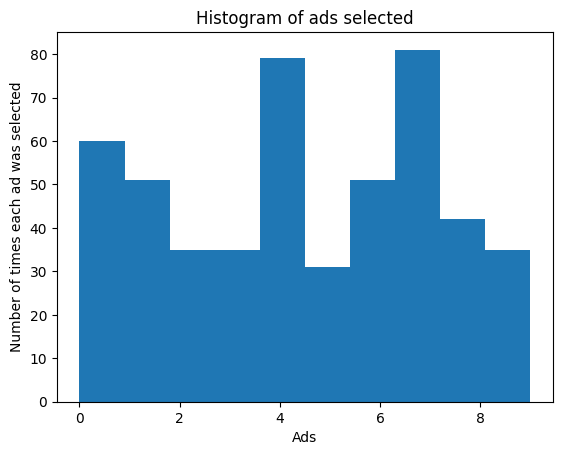

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()